In [58]:
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split, KFold


In [59]:
# Carregar o conjunto de dados Iris
iris = load_iris()

# Converter em DataFrame
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)

# Adicionar a coluna de targets
df['Target'] = iris.target

# Visualizar as primeiras linhas
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [60]:
# salvando para analisar no olho como ele funciona.
df.to_csv('iris_dataset.csv', index=False)

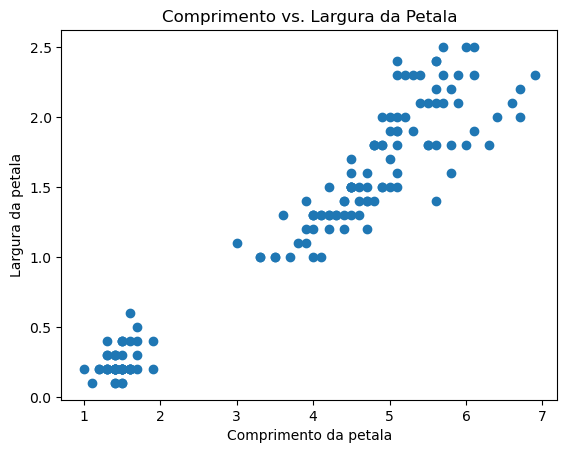

In [61]:
plt.scatter(iris.data[:, 2], iris.data[:, 3]) # 2 é a coluna de comprimento e 3 é a coluna de largura da petala
plt.xlabel('Comprimento da petala')
plt.ylabel('Largura da petala')
plt.title('Comprimento vs. Largura da Petala')
plt.show()

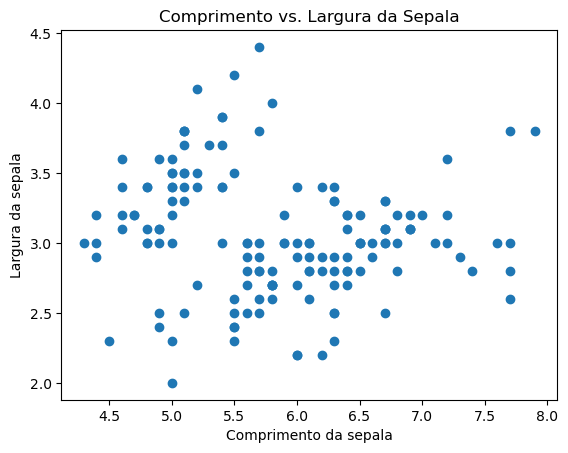

In [62]:
plt.scatter(iris.data[:, 0], iris.data[:, 1]) # 2 é a coluna de comprimento e 3 é a coluna de largura da petala
plt.xlabel('Comprimento da sepala')
plt.ylabel('Largura da sepala')
plt.title('Comprimento vs. Largura da Sepala')
plt.show()

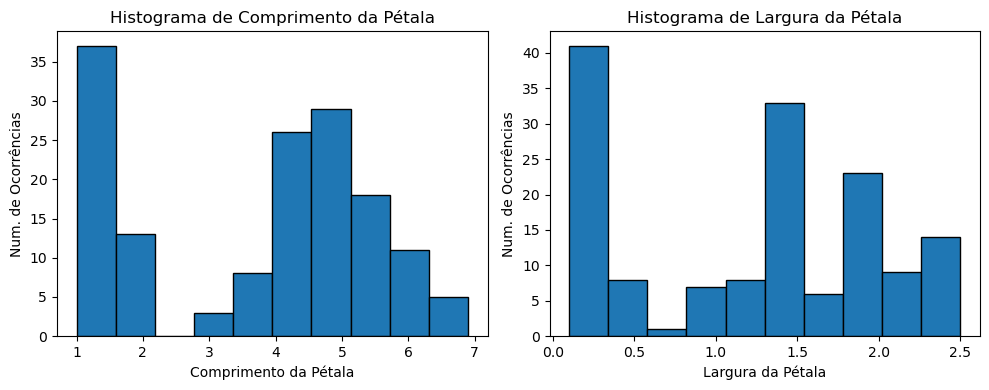

In [63]:
# Criando uma figura com dois subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plotando o histograma do comprimento da pétala
axs[0].hist(iris.data[:, 2], bins=10, edgecolor='black')
axs[0].set_xlabel('Comprimento da Pétala')
axs[0].set_ylabel('Num. de Ocorrências')
axs[0].set_title('Histograma de Comprimento da Pétala')

# Plotando o histograma da largura da pétala
axs[1].hist(iris.data[:, 3], bins=10, edgecolor='black')
axs[1].set_xlabel('Largura da Pétala')
axs[1].set_ylabel('Num. de Ocorrências')
axs[1].set_title('Histograma de Largura da Pétala')

# Ajustando o espaçamento entre os subplots
plt.tight_layout()

# Exibindo o gráfico
plt.show()

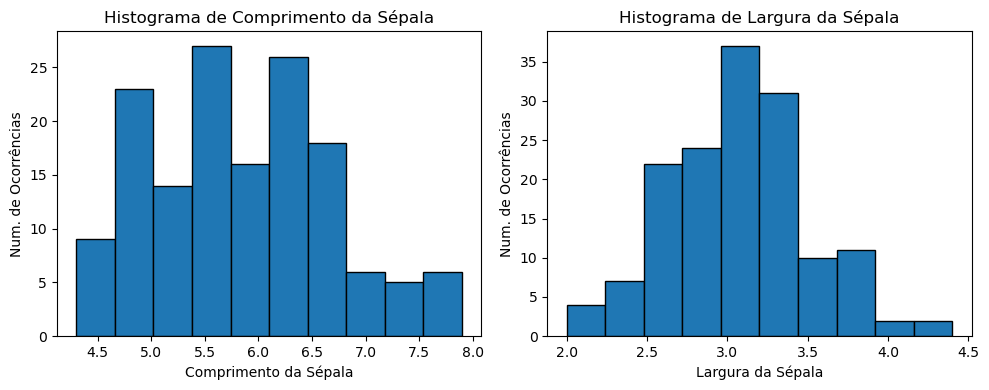

In [64]:
# Criando uma figura com dois subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plotando o histograma do comprimento da pétala
axs[0].hist(iris.data[:, 0], bins=10, edgecolor='black')
axs[0].set_xlabel('Comprimento da Sépala')
axs[0].set_ylabel('Num. de Ocorrências')
axs[0].set_title('Histograma de Comprimento da Sépala')

# Plotando o histograma da largura da pétala
axs[1].hist(iris.data[:, 1], bins=10, edgecolor='black')
axs[1].set_xlabel('Largura da Sépala')
axs[1].set_ylabel('Num. de Ocorrências')
axs[1].set_title('Histograma de Largura da Sépala')

# Ajustando o espaçamento entre os subplots
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [65]:
# Dividindo o conjunto de dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [66]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Target,0.782561,-0.426658,0.949035,0.956547,1.000000


Com a tabela de correlação podemos ver que as variáveis petal lenght e petal width tem mais correlação com nosso target que as outras, com uma correlação de ~0.95 e sepal lenght também é bastante correlacionado, com 0.78 de correlação, já sepal width é bem pouco correlacionado então estou pensando em tirar do nosso aprendizado.

In [96]:
# setando os valores que o professor pediu para teste inicial

k = 5  # Número de folds
max_iterations = 500
hidden_layer_sizes = 2
solver = 'adam' 
activation = 'identity'

kf = KFold(n_splits=k, shuffle=True, random_state=42)

/Users/matheus/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matheus/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matheus/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matheus/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matheus/anaconda3/lib

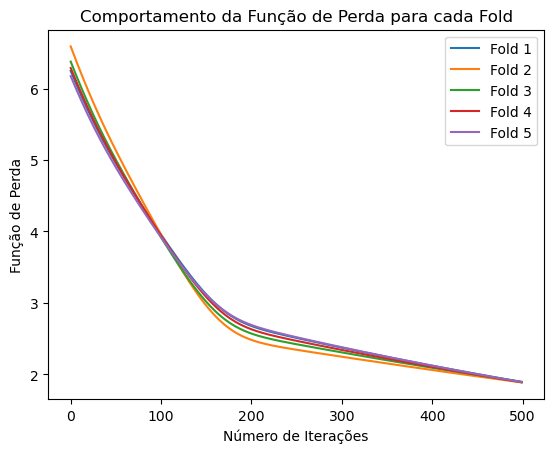

Fold 1:
Score de Treinamento: 0.06481481481481481
Score de Teste: 0.037037037037037035

Fold 2:
Score de Treinamento: 0.19444444444444445
Score de Teste: 0.0

Fold 3:
Score de Treinamento: 0.06481481481481481
Score de Teste: 0.07407407407407407

Fold 4:
Score de Treinamento: 0.12962962962962962
Score de Teste: 0.037037037037037035

Fold 5:
Score de Treinamento: 0.009259259259259259
Score de Teste: 0.0



In [94]:

train_scores = []
test_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
    
    model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                          max_iter=max_iterations,
                          activation=activation,
                          solver=solver,
                          random_state=42)
    
    # Treinando o modelo
    model.fit(X_fold_train, y_fold_train)
    
    # Calculando o score ( acurácia ) de treinamento
    train_score = model.score(X_fold_train, y_fold_train)
    train_scores.append(train_score)
    
    # Calculando o score ( acurácia ) de teste
    test_score = model.score(X_fold_val, y_fold_val)
    test_scores.append(test_score)
    
    # Obtendo as funções de perda durante o treinamento
    # losses.append(model.loss_curve_) # Não vamos usar isso aqui
    
    # Plotando a função de perda para o fold atual
    plt.plot(model.loss_curve_, label=f"Fold {fold+1}")
    
# Configurações do gráfico
plt.xlabel('Número de Iterações')
plt.ylabel('Função de Perda')
plt.title('Comportamento da Função de Perda para cada Fold')
plt.legend()
plt.show()

# Imprimindo os scores de treinamento e teste para cada fold
for fold in range(k):
    print(f"Fold {fold+1}:")
    print(f"Score de Treinamento: {train_scores[fold]}")
    print(f"Score de Teste: {test_scores[fold]}")
    print()

In [70]:
losses

[[6.308232368203352,
  6.2766085537001155,
  6.245163054946166,
  6.213898992533749,
  6.182819335659529,
  6.151926891205428,
  6.121224293046236,
  6.0907139919927875,
  6.060398246491197,
  6.030279114151476,
  6.000358444160041,
  5.9706378706172085,
  5.94111880682868,
  5.911802440568628,
  5.882689730320923,
  5.8537814024947235,
  5.825077949600946,
  5.796579629367496,
  5.76828646476359,
  5.740198244897111,
  5.7123145267440485,
  5.68463463766546,
  5.657157678665299,
  5.629882528341903,
  5.602807847486577,
  5.575932084284944,
  5.549253480080041,
  5.522770075660545,
  5.496479718042868,
  5.470380067721773,
  5.444468606370517,
  5.418742644977929,
  5.3931993324159295,
  5.367835664436523,
  5.342648493101574,
  5.317634536651758,
  5.2927903898220485,
  5.268112534609946,
  5.243597351498997,
  5.219241131133595,
  5.195040086431807,
  5.1709903651109075,
  5.147088062585676,
  5.123329235183039,
  5.099709913598723,
  5.076226116503476,
  5.052873864188765,
  5.0296

In [98]:
fold = kf.split(X_train)
fold = list(fold)
fold

[(array([  0,   1,   2,   3,   5,   6,   7,   8,   9,  11,  13,  14,  15,
          17,  20,  21,  22,  23,  24,  25,  28,  29,  30,  32,  33,  34,
          35,  36,  37,  38,  39,  41,  43,  46,  47,  48,  49,  50,  52,
          53,  54,  55,  56,  57,  58,  59,  60,  61,  63,  64,  65,  66,
          68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
          82,  83,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
          97,  99, 101, 102, 103, 104, 106, 107, 108, 109, 112, 113, 114,
         115, 116, 117, 118, 120, 121, 122, 123, 124, 126, 127, 129, 130,
         131, 132, 133, 134]),
  array([  4,  10,  12,  16,  18,  19,  26,  27,  31,  40,  42,  44,  45,
          51,  62,  67,  81,  84,  85,  98, 100, 105, 110, 111, 119, 125,
         128])),
 (array([  1,   2,   3,   4,   5,   6,   7,   8,  10,  12,  13,  14,  16,
          17,  18,  19,  20,  21,  23,  25,  26,  27,  28,  29,  31,  32,
          34,  35,  37,  38,  40,  41,  42,  43,  44,  45,  46, 